In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from SSMTIA.utils import mapping, parameter_range
from scipy import stats
import math

In [2]:
df = pd.read_csv("analysis/not_uploaded/SSMTIA_mobilenet_test_scores_parsed.csv", nrows=10000000)

df["score"] = (df["styles_score"] + df["technical_score"] + df["composition_score"])/3

df

,img,parameter,change,styles_score,technical_score,composition_score,contrast,brightness,saturation,shadows,...,pixelate,gaussian_noise,impulse_noise,rotate,hcrop,vcrop,leftcornerscrop,rightcornerscrop,ratio,score
0,abbey-glass-religion-architecture-106158.jpeg,original,0.0,0.4668,0.6313,0.34890,-0.045085,0.023738,-0.023805,-0.001279,...,0.082277,0.071359,0.060487,-0.005852,0.007350,-0.018588,-0.013100,-0.020139,-0.004353,0.482333
1,abraham-lincoln-lincoln-memorial-washington-dc...,original,0.0,0.9463,0.9880,0.79500,0.050945,-0.039294,0.018026,-0.007446,...,0.136534,0.012030,0.018849,-0.004750,-0.001232,0.003312,0.006391,-0.003862,-0.065174,0.909767
2,abstract-background-backgrounds-botany-87770.jpeg,original,0.0,0.9040,0.9966,0.63800,0.127809,-0.077767,0.030145,-0.035763,...,0.225810,0.021979,0.005621,0.002599,0.006348,0.002538,0.004732,0.003396,-0.021920,0.846200
3,adler-bird-bird-of-prey-raptor-53587.jpeg,original,0.0,0.2717,0.9310,0.05840,0.019672,-0.064353,-0.015254,-0.005767,...,0.058039,0.055130,0.036161,0.001481,-0.000690,-0.017206,-0.003039,-0.010912,0.030843,0.420367
4,adult-cute-face-female-41522.jpeg,original,0.0,0.8030,0.9277,0.68160,-0.073145,0.035358,-0.003241,-0.008536,...,0.102610,0.056476,0.075427,-0.000574,0.002464,0.013758,0.006693,-0.001000,0.024709,0.804100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744995,wood-painting-window-cactus-6689.jpg,ratio,5.0,0.4597,0.9600,0.29520,0.075690,-0.049272,-0.009808,-0.006905,...,0.110459,0.020371,0.032238,-0.003470,0.005751,-0.000143,-0.006052,-0.014057,-0.060432,0.571633
2744996,wood-sky-forest-autumn.jpg,ratio,5.0,0.9995,0.8510,0.94800,-0.091814,0.020498,-0.041252,0.005472,...,0.038913,0.075677,0.030474,-0.019526,0.006495,-0.004711,-0.017204,-0.002011,0.060286,0.932833
2744997,wood-stool-wooden-wine.jpg,ratio,5.0,0.9330,0.9860,0.50700,0.063294,-0.045544,0.011924,-0.024251,...,0.153380,0.017496,0.023330,-0.010402,0.001370,0.028357,0.024784,0.019370,0.020377,0.808667
2744998,wood-tree-brown-bark.jpg,ratio,5.0,0.3523,0.6060,0.07764,-0.005600,-0.073536,0.004581,-0.035540,...,0.089100,0.043877,0.057485,-0.011325,0.013910,0.005281,-0.011075,0.010765,0.003985,0.345313


In [3]:
pd.DataFrame(df[df["parameter"] != "original"][["img", "styles_score", "technical_score", "composition_score", "score"]].groupby("img").max().to_records()).sort_values("img")

,img,styles_score,technical_score,composition_score,score
0,SW_Pamela%2BWebb.jpg,0.9385,0.9766,0.5835,0.806133
1,abbey-glass-religion-architecture-106158.jpeg,0.8096,0.9430,0.4634,0.665600
2,abraham-lincoln-lincoln-memorial-washington-dc...,0.9937,0.9980,0.9976,0.993767
3,abstract-background-backgrounds-botany-87770.jpeg,0.9300,0.9995,0.8755,0.900933
4,adler-bird-bird-of-prey-raptor-53587.jpeg,0.8125,0.9775,0.3945,0.684000
...,...,...,...,...,...
14995,wood-painting-window-cactus-6689.jpg,0.9233,0.9834,0.8740,0.883867
14996,wood-sky-forest-autumn.jpg,1.0000,0.9740,1.0000,0.985233
14997,wood-stool-wooden-wine.jpg,0.9717,1.0000,0.8800,0.947800
14998,wood-tree-brown-bark.jpg,0.8720,0.9297,0.3574,0.644633


In [4]:
df[df["parameter"] == "original"][["img", "styles_score", "technical_score", "composition_score", "score"]].sort_values("img").reset_index()

,index,img,styles_score,technical_score,composition_score,score
0,2731283,SW_Pamela%2BWebb.jpg,0.7866,0.6670,0.1003,0.517967
1,0,abbey-glass-religion-architecture-106158.jpeg,0.4668,0.6313,0.3489,0.482333
2,1,abraham-lincoln-lincoln-memorial-washington-dc...,0.9463,0.9880,0.7950,0.909767
3,2,abstract-background-backgrounds-botany-87770.jpeg,0.9040,0.9966,0.6380,0.846200
4,3,adler-bird-bird-of-prey-raptor-53587.jpeg,0.2717,0.9310,0.0584,0.420367
...,...,...,...,...,...,...
14995,2740445,wood-painting-window-cactus-6689.jpg,0.7710,0.9090,0.6140,0.764667
14996,2740446,wood-sky-forest-autumn.jpg,1.0000,0.8670,0.9980,0.955000
14997,2740447,wood-stool-wooden-wine.jpg,0.8877,0.9946,0.5630,0.815100
14998,2740448,wood-tree-brown-bark.jpg,0.4050,0.7760,0.1180,0.433000


In [5]:
# & (df["parameter"] != "pixelate") & (df["parameter"] != "impulse_noise")
scores = pd.DataFrame(df[(df["parameter"] != "original")][["img", "styles_score", "technical_score", "composition_score"]].groupby("img").max().to_records()).sort_values("img").rename(columns={"styles_score":"best_score_styles", "technical_score":"best_score_technical", "composition_score":"best_score_composition"})
scores["orig_score_styles"] = df[df["parameter"] == "original"][["img", "styles_score"]].sort_values("img").reset_index()["styles_score"]
scores["orig_score_technical"] = df[df["parameter"] == "original"][["img", "technical_score"]].sort_values("img").reset_index()["technical_score"]
scores["orig_score_composition"] = df[df["parameter"] == "original"][["img", "composition_score"]].sort_values("img").reset_index()["composition_score"]
scores["diff_styles"] = scores["orig_score_styles"] - scores["best_score_styles"]
scores["diff_technical"] = scores["orig_score_technical"] - scores["best_score_technical"]
scores["diff_composition"] = scores["orig_score_composition"] - scores["best_score_composition"]
scores

,img,best_score_styles,best_score_technical,best_score_composition,orig_score_styles,orig_score_technical,orig_score_composition,diff_styles,diff_technical,diff_composition
0,SW_Pamela%2BWebb.jpg,0.9385,0.9766,0.5835,0.7866,0.6670,0.1003,-0.1519,-0.3096,-0.4832
1,abbey-glass-religion-architecture-106158.jpeg,0.8096,0.9430,0.4634,0.4668,0.6313,0.3489,-0.3428,-0.3117,-0.1145
2,abraham-lincoln-lincoln-memorial-washington-dc...,0.9937,0.9980,0.9976,0.9463,0.9880,0.7950,-0.0474,-0.0100,-0.2026
3,abstract-background-backgrounds-botany-87770.jpeg,0.9300,0.9995,0.8755,0.9040,0.9966,0.6380,-0.0260,-0.0029,-0.2375
4,adler-bird-bird-of-prey-raptor-53587.jpeg,0.8125,0.9775,0.3945,0.2717,0.9310,0.0584,-0.5408,-0.0465,-0.3361
...,...,...,...,...,...,...,...,...,...,...
14995,wood-painting-window-cactus-6689.jpg,0.9233,0.9834,0.8740,0.7710,0.9090,0.6140,-0.1523,-0.0744,-0.2600
14996,wood-sky-forest-autumn.jpg,1.0000,0.9740,1.0000,1.0000,0.8670,0.9980,0.0000,-0.1070,-0.0020
14997,wood-stool-wooden-wine.jpg,0.9717,1.0000,0.8800,0.8877,0.9946,0.5630,-0.0840,-0.0054,-0.3170
14998,wood-tree-brown-bark.jpg,0.8720,0.9297,0.3574,0.4050,0.7760,0.1180,-0.4670,-0.1537,-0.2394


In [6]:
scores.nlargest(10, "diff_styles")

,img,best_score_styles,best_score_technical,best_score_composition,orig_score_styles,orig_score_technical,orig_score_composition,diff_styles,diff_technical,diff_composition
3617,pexels-photo-1591930.jpeg,0.8696,0.9907,0.6777,0.8784,0.9688,0.5186,0.0088,-0.0219,-0.1591
13514,pexels-photo-757923.jpeg,0.9350,0.9900,0.8325,0.9414,0.9720,0.5615,0.0064,-0.0180,-0.2710
8814,pexels-photo-2707010.jpeg,0.8970,0.9985,0.2404,0.9010,0.9956,0.1536,0.0040,-0.0029,-0.0868
12234,pexels-photo-374852.jpeg,0.9897,0.9478,0.9510,0.9907,0.7780,0.8880,0.0010,-0.1698,-0.0630
2480,pexels-photo-1346089.jpeg,0.9870,0.9990,0.6694,0.9873,0.9917,0.5330,0.0003,-0.0073,-0.1364
17,american-football-football-football-player-qua...,1.0000,1.0000,1.0000,1.0000,1.0000,0.9995,0.0000,0.0000,-0.0005
23,animal-cute-kitten-cat.jpg,1.0000,0.9900,1.0000,1.0000,0.9260,1.0000,0.0000,-0.0640,0.0000
40,at-night-under-a-lantern-guy-night-city-163790...,1.0000,0.9380,1.0000,1.0000,0.7236,0.9950,0.0000,-0.2144,-0.0050
41,attractive-beautiful-brunette-cute-41539.jpeg,1.0000,0.9995,1.0000,1.0000,0.9990,1.0000,0.0000,-0.0005,0.0000
51,bald-eagle-bird-predator-feathered-68603.jpeg,1.0000,0.9985,1.0000,1.0000,0.9760,0.9985,0.0000,-0.0225,-0.0015


In [7]:
scores.nlargest(10, "diff_technical")

,img,best_score_styles,best_score_technical,best_score_composition,orig_score_styles,orig_score_technical,orig_score_composition,diff_styles,diff_technical,diff_composition
3626,pexels-photo-1595233.jpeg,0.9253,0.9736,0.2275,0.7520,0.9814,0.11646,-0.1733,0.0078,-0.11104
220,fashion-person-woman-taking-photo.jpg,0.8755,0.9970,0.6436,0.7607,0.9976,0.51900,-0.1148,0.0006,-0.12460
8007,pexels-photo-2505972.jpeg,0.9507,0.9976,0.5244,0.8990,0.9980,0.27370,-0.0517,0.0004,-0.25070
17,american-football-football-football-player-qua...,1.0000,1.0000,1.0000,1.0000,1.0000,0.99950,0.0000,0.0000,-0.00050
35,architecture-beautiful-building-church-87742.jpeg,0.9995,1.0000,0.9710,0.9507,1.0000,0.71630,-0.0488,0.0000,-0.25470
110,camera-vintage-lens-design.jpg,0.9060,1.0000,0.7925,0.6606,1.0000,0.55370,-0.2454,0.0000,-0.23880
284,girl-young-blue-eyes-eyes-39295.jpeg,1.0000,1.0000,1.0000,1.0000,1.0000,1.00000,0.0000,0.0000,0.00000
306,hand-taking-photo-photography-vintage.jpg,0.9790,1.0000,0.8630,0.9336,1.0000,0.61230,-0.0454,0.0000,-0.25070
379,lights-abstract-blur-orange.jpg,0.8170,1.0000,0.3958,0.5557,1.0000,0.29200,-0.2613,0.0000,-0.10380
380,lights-night-firework-new-year-s-eve.jpg,0.9950,1.0000,0.9270,0.9560,1.0000,0.92600,-0.0390,0.0000,-0.00100


In [8]:
scores.nlargest(10, "diff_composition")

,img,best_score_styles,best_score_technical,best_score_composition,orig_score_styles,orig_score_technical,orig_score_composition,diff_styles,diff_technical,diff_composition
23,animal-cute-kitten-cat.jpg,1.0,0.9900,1.0,1.0,0.926,1.0,0.0,-0.0640,0.0
41,attractive-beautiful-brunette-cute-41539.jpeg,1.0,0.9995,1.0,1.0,0.999,1.0,0.0,-0.0005,0.0
60,beauty-cold-elegance-face-41207.jpeg,1.0,0.9910,1.0,1.0,0.937,1.0,0.0,-0.0540,0.0
76,black-and-white-fence-crime-forbidden.jpg,1.0,0.9805,1.0,1.0,0.937,1.0,0.0,-0.0435,0.0
101,butterbur-petasites-composites-forest-flower-1...,1.0,0.9985,1.0,1.0,0.931,1.0,0.0,-0.0675,0.0
105,camcorder-camera-digital-equipment-41550.jpeg,1.0,1.0000,1.0,1.0,0.993,1.0,0.0,-0.0070,0.0
114,car-music-audio-controls.jpg,1.0,0.9840,1.0,1.0,0.876,1.0,0.0,-0.1080,0.0
122,cheesecake-table-dessert-cream-162688.jpeg,1.0,0.9546,1.0,1.0,0.876,1.0,0.0,-0.0786,0.0
123,cherries-in-a-bowl-fruit-summer-breakfast.jpg,1.0,0.9897,1.0,1.0,0.913,1.0,0.0,-0.0767,0.0
126,chillies-cans-chili-pepper-spicy.jpg,1.0,0.9990,1.0,1.0,0.982,1.0,0.0,-0.0170,0.0


In [9]:
scores.nsmallest(10, "diff_styles")

,img,best_score_styles,best_score_technical,best_score_composition,orig_score_styles,orig_score_technical,orig_score_composition,diff_styles,diff_technical,diff_composition
12963,pexels-photo-654692.jpeg,0.9610,0.9473,0.9800,0.03925,0.5415,0.30300,-0.92175,-0.4058,-0.67700
10671,pexels-photo-318426.jpeg,0.9950,0.8867,0.8430,0.07477,0.7217,0.26830,-0.92023,-0.1650,-0.57470
2398,pexels-photo-1329001.jpeg,0.9624,0.9920,0.6060,0.07996,0.9595,0.40190,-0.88244,-0.0325,-0.20410
2684,pexels-photo-1396133.jpeg,0.9873,0.9770,0.5737,0.11145,0.6690,0.19820,-0.87585,-0.3080,-0.37550
4822,pexels-photo-1821758.png,0.9844,0.9956,0.6836,0.10900,0.9023,0.47460,-0.87540,-0.0933,-0.20900
2223,pexels-photo-129731.jpeg,0.9990,0.9990,0.8670,0.12380,0.5990,0.56640,-0.87520,-0.4000,-0.30060
3944,pexels-photo-1653825.jpeg,0.9500,0.8423,0.2961,0.07715,0.5293,0.05444,-0.87285,-0.3130,-0.24166
8582,pexels-photo-2642692.jpeg,0.9736,0.9995,0.9860,0.10175,0.9530,0.54440,-0.87185,-0.0465,-0.44160
897,pexels-photo-105003.jpeg,0.9014,0.9990,0.3677,0.03363,0.9970,0.07623,-0.86777,-0.0020,-0.29147
4585,pexels-photo-1767727.jpeg,0.9995,1.0000,0.8335,0.13530,0.8438,0.18300,-0.86420,-0.1562,-0.65050


In [10]:
scores.nsmallest(10, "diff_technical")

,img,best_score_styles,best_score_technical,best_score_composition,orig_score_styles,orig_score_technical,orig_score_composition,diff_styles,diff_technical,diff_composition
10415,pexels-photo-3092138.jpeg,1.0000,0.9250,1.0000,1.0000,0.02210,1.00000,0.0000,-0.90290,0.00000
9501,pexels-photo-2878709.jpeg,1.0000,0.9243,1.0000,1.0000,0.09450,1.00000,0.0000,-0.82980,0.00000
684,pexels-photo-1022922.jpeg,0.8400,0.9060,0.6770,0.6284,0.08936,0.05050,-0.2116,-0.81664,-0.62650
11642,pexels-photo-3526843.jpeg,1.0000,0.8784,1.0000,1.0000,0.06323,1.00000,0.0000,-0.81517,0.00000
12133,pexels-photo-3641969.jpeg,1.0000,0.8780,1.0000,1.0000,0.10986,1.00000,0.0000,-0.76814,0.00000
3373,pexels-photo-154510.jpeg,0.9995,0.9424,0.9970,0.9480,0.17870,0.43730,-0.0515,-0.76370,-0.55970
14197,pexels-photo-907169.jpeg,0.8755,0.9585,0.4934,0.3005,0.20900,0.12225,-0.5750,-0.74950,-0.37115
4492,pexels-photo-1748599.jpeg,1.0000,0.9067,1.0000,1.0000,0.16170,0.99660,0.0000,-0.74500,-0.00340
1087,pexels-photo-1080400.jpeg,0.9630,0.9540,0.8037,0.7285,0.21370,0.47660,-0.2345,-0.74030,-0.32710
77,black-and-white-restaurant-lunch-kitchen.jpg,0.9100,0.9920,0.6700,0.3190,0.25300,0.17630,-0.5910,-0.73900,-0.49370


In [11]:
scores.nsmallest(10, "diff_composition")

,img,best_score_styles,best_score_technical,best_score_composition,orig_score_styles,orig_score_technical,orig_score_composition,diff_styles,diff_technical,diff_composition
3627,pexels-photo-1595245.jpeg,1.0000,0.9430,1.000,0.47400,0.2983,0.04633,-0.52600,-0.6447,-0.95367
7665,pexels-photo-2432189.jpeg,1.0000,0.9810,1.000,0.31470,0.9004,0.06714,-0.68530,-0.0806,-0.93286
272,gecko-rough-knob-lizard-australia-94271.jpeg,0.9536,0.7876,0.997,0.36470,0.6226,0.07320,-0.58890,-0.1650,-0.92380
4361,pexels-photo-1715507.jpeg,1.0000,0.9040,1.000,0.92400,0.5040,0.10150,-0.07600,-0.4000,-0.89850
10560,pexels-photo-3152184.jpeg,0.9910,0.9940,0.946,0.32670,0.8677,0.05457,-0.66430,-0.1263,-0.89143
10294,pexels-photo-3059507.jpeg,0.9126,0.9414,0.913,0.10175,0.6597,0.04596,-0.81085,-0.2817,-0.86704
703,pexels-photo-1025586.jpeg,1.0000,0.9710,1.000,0.89300,0.7837,0.13930,-0.10700,-0.1873,-0.86070
5901,pexels-photo-208414.jpeg,0.9500,0.9780,0.959,0.33250,0.8315,0.12164,-0.61750,-0.1465,-0.83736
9899,pexels-photo-2955816.jpeg,0.9380,0.9873,0.964,0.87000,0.5700,0.12870,-0.06800,-0.4173,-0.83530
10514,pexels-photo-3139074.jpeg,1.0000,0.8945,1.000,0.33350,0.4978,0.18160,-0.66650,-0.3967,-0.81840


In [12]:
nsmall = []
for i, row in scores.nsmallest(10, "diff_styles").iterrows():
    nsmall.append(df[(df["img"] == row.img) & (df["styles_score"] == row.best_score_styles)])
pd.concat(nsmall)

,img,parameter,change,styles_score,technical_score,composition_score,contrast,brightness,saturation,shadows,...,pixelate,gaussian_noise,impulse_noise,rotate,hcrop,vcrop,leftcornerscrop,rightcornerscrop,ratio,score
2371337,pexels-photo-654692.jpeg,exposure,1.20,0.9610,0.03387,0.35470,-0.359556,-0.000155,-0.064200,-0.042684,...,0.022213,0.090942,0.131616,-0.006392,0.018647,-0.012964,-0.017872,-0.018069,0.163985,0.449857
1951545,pexels-photo-318426.jpeg,motion_blur,1.00,0.9950,0.45560,0.83100,-0.037925,-0.102814,0.040713,-0.043834,...,0.074154,0.065275,0.194403,-0.027919,0.005092,-0.011707,-0.013682,-0.012841,0.051089,0.760533
1951620,pexels-photo-318426.jpeg,motion_blur,4.00,0.9950,0.46100,0.83100,-0.034980,-0.099306,0.035980,-0.042008,...,0.074415,0.064186,0.196097,-0.027548,0.004738,-0.010459,-0.011568,-0.011689,0.048691,0.762333
1951645,pexels-photo-318426.jpeg,motion_blur,5.00,0.9950,0.47780,0.78700,-0.035132,-0.091330,0.030144,-0.040682,...,0.074570,0.060676,0.197252,-0.026019,0.005133,-0.008764,-0.008671,-0.009786,0.053236,0.753267
436722,pexels-photo-1329001.jpeg,tint,0.75,0.9624,0.99000,0.26300,-0.010430,0.048189,-0.039516,-0.036236,...,0.091543,0.024368,0.017337,-0.002129,-0.004801,0.054385,0.038683,0.043653,0.002042,0.738467
492208,pexels-photo-1396133.jpeg,motion_blur,5.00,0.9873,0.43480,0.57370,-0.064081,-0.056165,0.012873,-0.035451,...,0.072667,0.059524,0.205795,-0.023190,0.009523,-0.008032,-0.007731,-0.010573,0.065081,0.665267
880496,pexels-photo-1821758.png,tint,0.75,0.9844,0.98630,0.48140,0.073057,-0.007084,-0.001711,-0.026760,...,0.160278,0.044155,0.024309,-0.013573,-0.014946,0.020070,0.010699,0.015706,0.001838,0.817367
404172,pexels-photo-129731.jpeg,exposure,3.00,0.9990,0.97000,0.79830,-0.031116,-0.241344,0.101743,-0.112037,...,0.026483,0.021361,0.063101,-0.060077,0.012526,0.001438,-0.009960,-0.015893,0.169153,0.922433
720393,pexels-photo-1653825.jpeg,tint,0.80,0.9500,0.74460,0.12463,0.015693,-0.033100,-0.032250,-0.019520,...,0.142264,0.052737,0.044493,-0.030087,-0.003234,-0.014653,-0.000652,-0.000222,-0.041388,0.606410
1570981,pexels-photo-2642692.jpeg,temperature,3000.00,0.9736,0.99950,0.88870,-0.001657,-0.038323,0.002647,-0.008977,...,0.036333,0.008965,0.001020,-0.008924,-0.012670,0.012011,-0.016608,-0.017898,-0.039644,0.953933


In [13]:
nsmall = []
for i, row in scores.nsmallest(10, "diff_technical").iterrows():
    nsmall.append(df[(df["img"] == row.img) & (df["technical_score"] == row.best_score_technical)])
pd.concat(nsmall)

,img,parameter,change,styles_score,technical_score,composition_score,contrast,brightness,saturation,shadows,...,pixelate,gaussian_noise,impulse_noise,rotate,hcrop,vcrop,leftcornerscrop,rightcornerscrop,ratio,score
1906264,pexels-photo-3092138.jpeg,impulse_noise,5.00,1.0000,0.9250,1.0000,-0.134868,0.048318,-0.004155,0.047425,...,0.015864,0.019979,0.000231,-0.014299,-0.027741,0.020934,-0.010778,0.024815,0.088728,0.975000
1742675,pexels-photo-2878709.jpeg,rightcornerscrop,-1.00,1.0000,0.9243,1.0000,-0.162677,0.055395,-0.081268,0.024919,...,0.040002,0.041105,0.010956,0.005014,0.011759,-0.012762,-0.013059,-0.025109,0.055661,0.974767
124858,pexels-photo-1022922.jpeg,exposure,-3.00,0.2883,0.9060,0.3060,0.013892,-0.014059,-0.030607,-0.008572,...,0.124030,0.047113,0.071648,0.001829,0.009324,-0.012289,-0.009212,0.003966,0.043446,0.500100
2129116,pexels-photo-3526843.jpeg,temperature,2000.00,1.0000,0.8784,0.9985,-0.092353,-0.052428,0.019732,0.005481,...,0.090832,0.042155,0.021945,-0.013547,-0.009258,-0.002658,-0.017000,-0.005564,0.057686,0.958967
2221807,pexels-photo-3641969.jpeg,gaussian_noise,5.00,1.0000,0.8780,1.0000,-0.204591,0.059702,-0.024557,0.038373,...,0.019843,0.017376,0.000248,-0.016993,-0.014001,0.006925,-0.017908,0.006139,0.172563,0.959333
614547,pexels-photo-154510.jpeg,exposure,1.20,0.9960,0.9424,0.9297,0.000604,-0.235223,0.049915,-0.127520,...,0.067889,0.031747,0.055178,0.000944,0.002218,0.024674,0.023397,0.006496,0.001439,0.956033
2598571,pexels-photo-907169.jpeg,ratio,4.00,0.7295,0.9585,0.0816,-0.081286,-0.017475,0.008252,0.006998,...,0.077217,0.015425,0.024408,-0.000059,0.001335,-0.003141,-0.000437,0.000442,0.040074,0.589867
818966,pexels-photo-1748599.jpeg,contrast,-1.00,1.0000,0.9067,1.0000,-0.104513,0.072142,-0.029083,0.036817,...,0.051856,0.026669,0.010944,0.002067,-0.019180,0.001791,-0.023512,0.000820,0.050304,0.968900
198811,pexels-photo-1080400.jpeg,tint,0.75,0.9630,0.9540,0.4436,0.103191,-0.146298,0.040318,-0.046083,...,0.113112,0.043535,0.077922,-0.011000,-0.012333,-0.005936,0.015008,-0.011238,-0.040712,0.786867
15276,black-and-white-restaurant-lunch-kitchen.jpg,exposure,3.00,0.7715,0.9920,0.6130,0.075599,-0.158190,0.049910,-0.063851,...,0.126159,0.015632,0.028855,-0.011973,0.018339,0.020759,0.017438,-0.005198,-0.022084,0.792167


In [14]:
nsmall = []
for i, row in scores.nsmallest(10, "diff_composition").iterrows():
    nsmall.append(df[(df["img"] == row.img) & (df["composition_score"] == row.best_score_composition)])
pd.concat(nsmall)

,img,parameter,change,styles_score,technical_score,composition_score,contrast,brightness,saturation,shadows,...,pixelate,gaussian_noise,impulse_noise,rotate,hcrop,vcrop,leftcornerscrop,rightcornerscrop,ratio,score
663401,pexels-photo-1595245.jpeg,contrast,-1.0,1.0000,0.6570,1.000,-0.197303,0.108999,-0.046641,0.065670,...,0.030499,0.064654,0.035363,0.017348,0.001808,-0.004657,-0.023096,-0.008759,0.088157,0.885667
663426,pexels-photo-1595245.jpeg,contrast,-0.8,1.0000,0.8965,1.000,-0.187135,0.123478,-0.085548,0.064888,...,0.023647,0.047951,0.103117,0.033548,0.001862,-0.022033,-0.028006,-0.014004,0.097009,0.965500
663451,pexels-photo-1595245.jpeg,contrast,-0.6,1.0000,0.9385,1.000,-0.102024,0.068350,-0.078020,0.044546,...,0.023087,0.056248,0.093510,0.025288,-0.003335,-0.025648,-0.032631,-0.018753,0.090763,0.979500
666201,pexels-photo-1595245.jpeg,gaussian_noise,1.0,1.0000,0.7827,1.000,-0.100160,0.024089,-0.035978,0.039605,...,0.028955,0.068799,0.016410,0.007462,-0.019644,-0.017067,-0.035705,-0.022486,0.106462,0.927567
666226,pexels-photo-1595245.jpeg,gaussian_noise,2.0,1.0000,0.7104,1.000,-0.132598,0.038358,-0.040720,0.034221,...,0.021091,0.088216,0.008781,0.006859,-0.009511,-0.016453,-0.040294,-0.019699,0.106746,0.903467
666251,pexels-photo-1595245.jpeg,gaussian_noise,3.0,1.0000,0.7163,1.000,-0.187284,0.080435,-0.057049,0.027099,...,0.020280,0.050801,0.002348,0.010472,-0.007484,-0.014137,-0.032371,-0.014557,0.111752,0.905433
666276,pexels-photo-1595245.jpeg,gaussian_noise,4.0,1.0000,0.7790,1.000,-0.180050,0.079081,-0.033090,0.026740,...,0.024361,0.033847,0.000793,0.015760,-0.010336,0.001587,-0.018484,0.007348,0.119269,0.926333
666301,pexels-photo-1595245.jpeg,gaussian_noise,5.0,1.0000,0.7930,1.000,-0.107899,0.019441,-0.032272,0.013016,...,0.028547,0.024420,0.000757,0.011200,-0.002401,0.006102,-0.017660,-0.000239,0.093845,0.931000
666376,pexels-photo-1595245.jpeg,impulse_noise,3.0,1.0000,0.8086,1.000,-0.104090,0.031667,0.000198,0.013004,...,0.091470,0.022860,0.004643,-0.017005,0.000195,0.014623,-0.011864,0.007409,0.039494,0.936200
666401,pexels-photo-1595245.jpeg,impulse_noise,4.0,1.0000,0.5830,1.000,-0.123636,0.029381,-0.034360,0.019666,...,0.068670,0.037232,0.005513,-0.012599,0.005422,0.011360,-0.007510,0.004097,0.041903,0.861000


&lt;matplotlib.legend.Legend at 0x7fa412b00e20&gt;

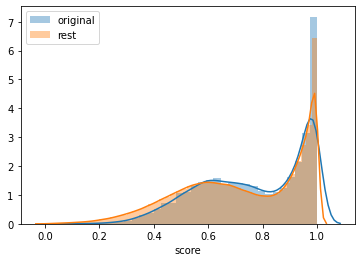

In [15]:
sns.distplot(df[df["parameter"] == "original"]["score"], label="original")
sns.distplot(df[df["parameter"] != "original"]["score"], label="rest")
plt.legend()

&lt;matplotlib.legend.Legend at 0x7fa4700ab6a0&gt;

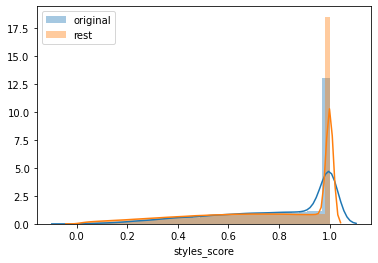

In [16]:
sns.distplot(df[df["parameter"] == "original"]["styles_score"], label="original")
sns.distplot(df[df["parameter"] != "original"]["styles_score"], label="rest")
plt.legend()

&lt;matplotlib.legend.Legend at 0x7fa3ec9bb610&gt;

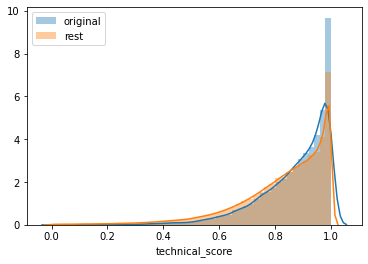

In [17]:
sns.distplot(df[df["parameter"] == "original"]["technical_score"], label="original")
sns.distplot(df[df["parameter"] != "original"]["technical_score"], label="rest")
plt.legend()

&lt;matplotlib.legend.Legend at 0x7fa412dac370&gt;

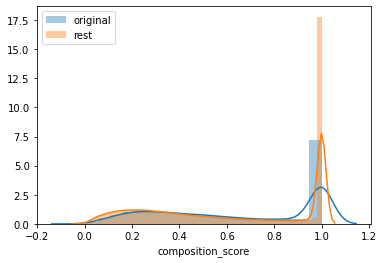

In [18]:
sns.distplot(df[df["parameter"] == "original"]["composition_score"], label="original")
sns.distplot(df[df["parameter"] != "original"]["composition_score"], label="rest")
plt.legend()

In [19]:
def histogram_distortion(distortion:str, score:str):
    sns.distplot(df[df["parameter"] == "original"][score], label="original")
    for change in (val for val in mapping["all_changes"] if distortion in val):
        parameter, change = change.split(";")
        sns.distplot(df[(df["parameter"] == parameter) & (df["change"] == float(change))][score], label=f"{parameter}: {change}")
    plt.legend()

In [20]:
def violin_distortion(distortion:str, score:str):
    plot_frame = df[(df["parameter"] == distortion) | (df["parameter"] == "original")]
    if distortion in parameter_range:
        plot_frame.loc[plot_frame["parameter"] == "original", "change"] = parameter_range[distortion]["default"]
    sns.violinplot(data=plot_frame, x="change", y=score, color="steelblue")

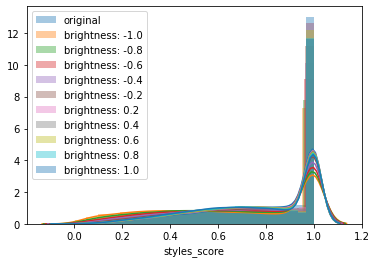

In [21]:
histogram_distortion("brightness", "styles_score")

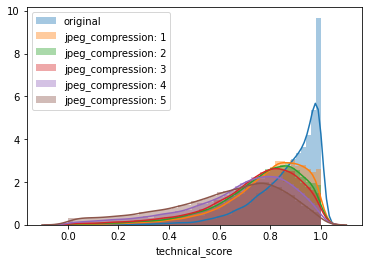

In [22]:
histogram_distortion("jpeg_compression", "technical_score")

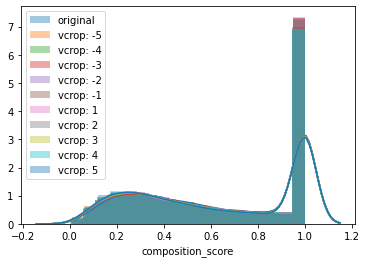

In [23]:
histogram_distortion("vcrop", "composition_score")

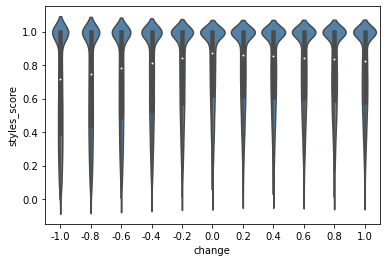

In [24]:
violin_distortion("brightness", "styles_score")

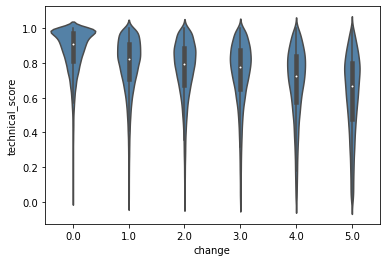

In [25]:
violin_distortion("jpeg_compression", "technical_score")

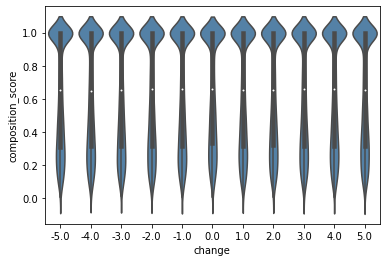

In [26]:
violin_distortion("hcrop", "composition_score")

In [27]:
def violin_changes():
    fig, axs = plt.subplots(nrows=1, ncols=3)
    for dist_i, distortion in enumerate(["styles", "technical", "composition"]):
        original_frame = df[df["parameter"] == "original"]
        results = []
        df_index = list(original_frame.columns).index(f"{distortion}_change_strength")
        for index, row in original_frame.iterrows():
            for i, k in enumerate(mapping[distortion].keys()):
                results.append({"distortion":distortion, "change_predict": k, "change_strength":row[df_index][i]})
        results = (pd.DataFrame([val], columns=val.keys()) for val in results)
        sns.violinplot(data=pd.concat(results, ignore_index=True), x="change_predict", y="change_strength", color="steelblue", ax=axs[dist_i])
        axs[dist_i].tick_params(axis='x', labelrotation=75)
        axs[dist_i].hlines(0, 0, 8, colors="grey")

In [28]:
violin_changes()

ValueError: &#39;styles_change_strength&#39; is not in list

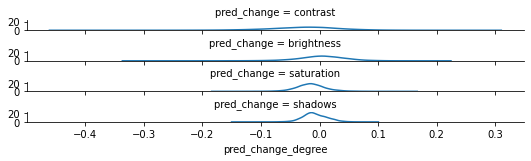

In [24]:
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

fg = sns.FacetGrid(df[(df["parameter"] == "saturation") & (df["change"] == 1.0)], row="pred_change", aspect=15, height=.5)
fg.map(sns.kdeplot, "pred_change_degree")

#fg.map(label, "pred_change")

#fg.set_titles("")
#fg.set(yticks=[])
#fg.despine(bottom=True, left=True)

In [97]:
def calculate_spearman(distortion:str, polarity: str, img_names=df["img"].unique()):
    corr_l = []
    p_l = []
    original_df = df[df["parameter"] == "original"]
    if distortion in parameter_range:
            original_df["change"] = parameter_range[distortion]["default"]

    parameter_df = df[df["parameter"] == distortion]
    corr_df = pd.concat([parameter_df, original_df])[["img", "parameter", "change", "score"]]

    for i, f in enumerate(img_names):
        if i % 1000 == 0:
            print(i)
        corr_df_img = corr_df[corr_df["img"] == f]
        
        if distortion in parameter_range:
            default = parameter_range[distortion]["default"]
        else:
            default = 0

        if polarity == "pos":
            corr_df_img = corr_df_img[corr_df_img["change"] >= default]
        else:
            corr_df_img = corr_df_img[corr_df_img["change"] <= default]
        
        corr_df_img["change"] = corr_df_img["change"].apply(lambda x: abs((x)- (default)))

        print(corr_df_img)
        break

        c, p = stats.spearmanr(corr_df_img["score"], corr_df_img["change"])
        corr_l.append(c)
        p_l.append(p)
    return sum(corr_l)/len(corr_l), sum(p_l)/len(p_l)

In [98]:
calculate_spearman(distortion="vibrance", polarity="pos")

0
                                                img parameter  change  \
1625  abbey-glass-religion-architecture-106158.jpeg  vibrance    15.0   
1650  abbey-glass-religion-architecture-106158.jpeg  vibrance    35.0   
1675  abbey-glass-religion-architecture-106158.jpeg  vibrance    55.0   
1700  abbey-glass-religion-architecture-106158.jpeg  vibrance    75.0   
0     abbey-glass-religion-architecture-106158.jpeg  original     0.0   

         score  
1625  0.493900  
1650  0.501333  
1675  0.496800  
1700  0.500000  
0     0.482333  


ZeroDivisionError: division by zero